## 1) Delivery_time -> Predict delivery time using sorting time 

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## 1.Import necessary Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 2.Import the Data

In [5]:
delivarytime_df = pd.read_csv('delivery_time.csv')
delivarytime_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3.Data Understanding

In [6]:
delivarytime_df.shape

(21, 2)

In [7]:
delivarytime_df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
delivarytime_df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

### Checking assumptions by plotting

### Scatter Plot

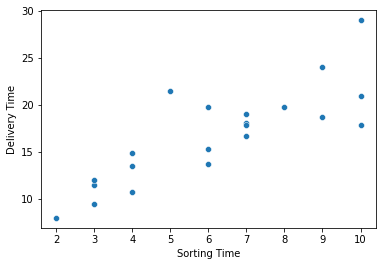

In [39]:
sns.scatterplot(x = 'Sorting Time', y= 'Delivery Time', data = delivarytime_df )
plt.show()

In [40]:
delivarytime_df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


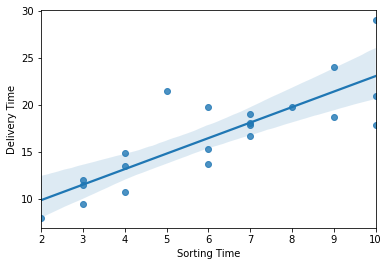

In [41]:
sns.regplot(x = 'Sorting Time', y= 'Delivery Time', data = delivarytime_df )
plt.show()

In [32]:
import warnings
warnings.filterwarnings("ignore")

#### To check the outliers

<AxesSubplot:xlabel='Sorting Time'>

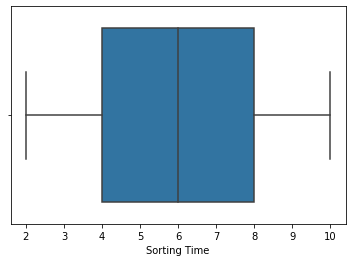

In [33]:
sns.boxplot(delivarytime_df['Sorting Time']) #No outliers

<AxesSubplot:xlabel='Delivery Time'>

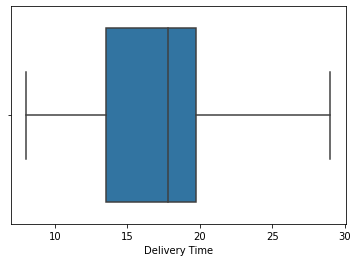

In [34]:
sns.boxplot(delivarytime_df['Delivery Time'])  #No outliers

## 4.Model Building

In [9]:
#Diving the data into input and output
X = delivarytime_df[['Sorting Time']]
y = delivarytime_df[['Delivery Time']]

In [10]:
X

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [11]:
#Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape

(16, 1)

In [13]:
X_test.shape

(5, 1)

## 5.Model Training

In [14]:
lin_model = LinearRegression()

In [15]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [16]:
#slope
lin_model.coef_

array([[1.65695232]])

In [17]:
lin_model.intercept_

array([6.41583967])

## 6.Model Testing

In [18]:
X_test

,Sorting Time
10,8
6,7
0,10
14,3
3,9


In [46]:
#manual
#y = mx+b
(1.65695232 * 8) + 6.41583967

19.67145823

In [19]:
y_test_pred = lin_model.predict(X_test)
y_test_pred

array([[19.67145819],
       [18.01450587],
       [22.98536282],
       [11.38669661],
       [21.3284105 ]])

## 7.Model Evaluation

In [20]:
mean_squared_error(y_test,y_test_pred)

2.4978458765150036

In [39]:
# Finding Rsquared Value
r2_score(y_test,y_test_pred)

0.8401314793938008

## 8.Model Deployment

In [21]:
from pickle import dump

In [22]:
dump(lin_model,open('lin_model.pkl','wb'))

In [23]:
from pickle import load

In [24]:
linear_intellegence = load(open('lin_model.pkl','rb'))

In [25]:
linear_intellegence.predict(X_test)

array([[19.67145819],
       [18.01450587],
       [22.98536282],
       [11.38669661],
       [21.3284105 ]])

In [33]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [34]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [35]:
linear_intellegence.predict(data_pred)

array([[14.70060124],
       [19.67145819]])

###  Conclusion - As the mse is 2.4 we can use this linear regression model for predicting delivary time